## Image Classification with ConvNet (No Dropout or Data-Augmentation)

Using section 5.2 in Deep Learning with Python as a guide, create a ConvNet model that classifies images CIFAR10 small images classification dataset. Do not use dropout or data-augmentation in this part. Save the model, predictions, metrics, and validation plots in the dsc650/assignments/assignment06/results directory. If you are using JupyterHub, you can include those plots in your Jupyter notebook.

Using code from [deep-learning-with-python-notebooks](https://github.com/fchollet/deep-learning-with-python-notebooks) <br>
Using code from [CIFAR-10 Photo Classification Dataset](https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/)

In [3]:
## Import the necessary modules for the assignment above.
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import sklearn
from sklearn.model_selection import train_test_split
import itertools
from pathlib import Path
import time
import os, shutil

## Import the necessary keras components for the data and CNN
from keras import layers, models
from keras.datasets import cifar10
from keras.utils import to_categorical, np_utils
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.optimizers import SGD
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
## Print versions of essential packages
print("keras version: {}".format(keras.__version__))
print("tensorflow version: {}".format(tf.__version__))
print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))

keras version: 2.11.0
tensorflow version: 2.11.0
pandas version: 1.5.3
numpy version: 1.24.2


In [5]:
## Setup the directories for the assignment
current_dir = Path('C:/Users/jkmey/Documents/Github/DSC650_Course_Assignments/dsc650/dsc650/assignments/assignment06')
results_dir = Path('C:/Users/jkmey/Documents/Github/DSC650_Course_Assignments/dsc650/dsc650/assignments/assignment06/').joinpath('results')
results_dir.mkdir(parents = True, exist_ok = True)

### Import the CIFAR10 Dataset

In [6]:
## Load the dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()

In [7]:
## Understand the shape of the train and test datasets.
print('trainX: {}'.format(trainX.shape))
print('testX: {}'.format(testX.shape))
print('trainy: {}'.format(trainy.shape))
print('testy: {}'.format(testy.shape))

trainX: (50000, 32, 32, 3)
testX: (10000, 32, 32, 3)
trainy: (50000, 1)
testy: (10000, 1)


### Show Training Images and Labels

First 16 Training Images and Labels


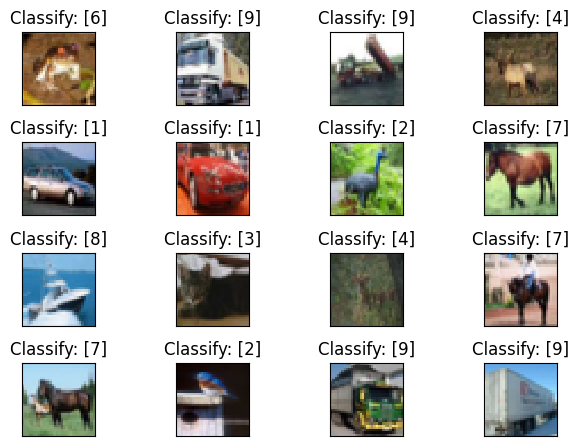

In [8]:
## Show the first 16 training images and labels for better understanding of the data.
fig = plt.figure()
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.tight_layout()
    plt.imshow(trainX[i], cmap = 'gray', interpolation='none')
    plt.title("Classify: {}".format(trainy[i]))
    plt.xticks([])
    plt.yticks([])
img_file = results_dir.joinpath('assignment06-2a_Sample_Images_QTY_16.png')
plt.savefig(img_file)
print("First 16 Training Images and Labels")
plt.show()

Referenced [CIFAR10](https://keras.io/api/datasets/cifar10/) for available classes.

In [9]:
## Define the classes for images within a list for the image dataset.
image_classes = ['airplane', 'automobile', 'bird', 'cat', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

### Pixel Value Histogram

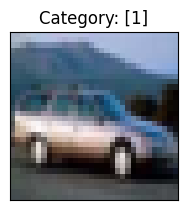

In [10]:
## Code to check the digit in the train image with the label shown from 0-9.
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(trainX[4], cmap = 'gray', interpolation = 'none')
plt.title('Category: {}'.format(trainy[4]))
plt.xticks([])
plt.yticks([])
img_file = results_dir.joinpath('assignment06-2a_Digit_Overview.png')
plt.savefig(img_file)
plt.show()

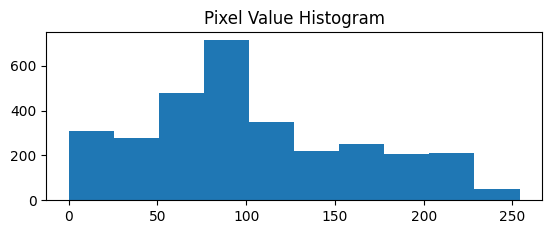

In [11]:
## Pixel distribution shown in the plot below for the image chosen in the previous cell.
plt.subplot(2,1,2)
plt.hist(trainX[4].reshape(3072)) # Value needs to be 3072 for reshape, otherwise error
plt.title("Pixel Value Histogram")
img_file = results_dir.joinpath('assignment06-2a_Pixel_Value_Histogram.png')
plt.savefig(img_file)
plt.show()

### Prepare the Data

In [12]:
## Normalize the training and test images.
train_images = trainX.astype('float32') / 255
test_images = testX.astype('float32') / 255

## Convert the training and test labels to numbers.
train_labels = to_categorical(trainy)
test_labels = to_categorical(testy)

In [13]:
## Split train_images and train_labels into train and validation subsets.
train_images_val = train_images[:10000]
train_images = train_images[10000:]
train_labels_val = train_labels[:10000]
train_labels = train_labels[10000:]

### Create the ConvNet Model

In [14]:
## Use the code from the textbook Github repository for section 5.2. Also, remember the shape input shape (32,32,3)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
    
## Compile the Model. Choosing categorical crossentropy as loss and accuracy as metric.
## Also, define an optimizer with a learning rate of 0.001 and momentum of 0.9.
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
## Show a summary of the model.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

### Train the Model

In [16]:
## Train the model and store the results in the variable history.
history = model.fit(train_images, train_labels, epochs=20, batch_size=32, verbose = 1, 
                         validation_data = (train_images_val, train_labels_val))

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - ETA: 0s - loss: 1.6764 - acc: 0.3981

C:\Users\jkmey\anaconda3\envs\dsc650\lib\site-packages\keras\engine\training_v1.py:2333: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


40000/40000 [==============================] - 75s 2ms/sample - loss: 1.6764 - acc: 0.3981 - val_loss: 1.4222 - val_acc: 0.4860
Epoch 2/20
40000/40000 [==============================] - 74s 2ms/sample - loss: 1.2945 - acc: 0.5376 - val_loss: 1.1595 - val_acc: 0.5926
Epoch 3/20
40000/40000 [==============================] - 75s 2ms/sample - loss: 1.1051 - acc: 0.6096 - val_loss: 1.0206 - val_acc: 0.6448
Epoch 4/20
40000/40000 [==============================] - 75s 2ms/sample - loss: 0.9723 - acc: 0.6598 - val_loss: 0.9429 - val_acc: 0.6678
Epoch 5/20
40000/40000 [==============================] - 73s 2ms/sample - loss: 0.8608 - acc: 0.6981 - val_loss: 0.9123 - val_acc: 0.6813
Epoch 6/20
40000/40000 [==============================] - 69s 2ms/sample - loss: 0.7757 - acc: 0.7319 - val_loss: 0.8571 - val_acc: 0.6960
Epoch 7/20
40000/40000 [==============================] - 70s 2ms/sample - loss: 0.6954 - acc: 0.7597 - val_loss: 0.8162 - val_acc: 0.7134
Epoch 8/20
40000/40000 [==============

In [17]:
## Save the result model file to the results directory.
result_model_file = results_dir.joinpath('assignment06-2a_Model.h5')
model.save(result_model_file)
print("Saved the Trained model at %s " % result_model_file)

Saved the Trained model at C:\Users\jkmey\Documents\Github\DSC650_Course_Assignments\dsc650\dsc650\assignments\assignment06\results\assignment06-2a_Model.h5 


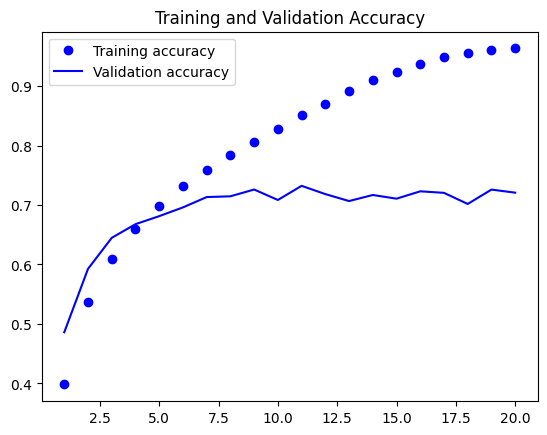

In [18]:
## Generate and Save Plot of Training and Validation Accuracy from Model.
accuracy = history.history["acc"]
val_accuracy = history.history["val_acc"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
img_file = results_dir.joinpath('assignment06-2a_Training_and_Validation_Accuracy_Plot.png')
plt.savefig(img_file)
plt.show()

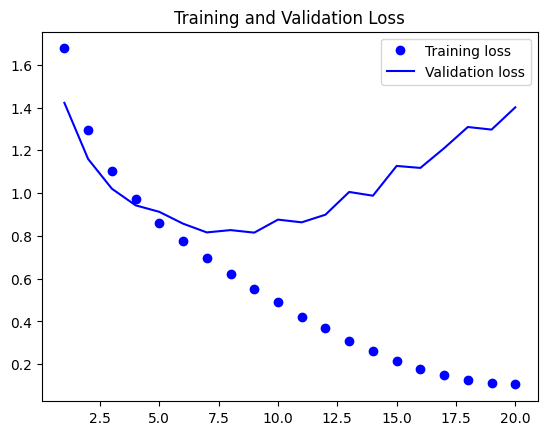

In [19]:
## Generate and Save Plot of Training and Validation Loss from Model.
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and Validation Loss")
plt.legend()
img_file = results_dir.joinpath('assignment06-2a_Training_and_Validation_Loss_Plot.png')
plt.savefig(img_file)
plt.show()

### CNN Results on Test Data

In [20]:
## Evaluate the model on the test subsets. Code from the textbook repository.
test_loss, test_acc = model.evaluate(test_images, test_labels)

In [21]:
## Show the Test Accuracy and Loss from the cell above.
print("Test Accuracy: {}%".format((test_acc)*100))
print("Test Loss: {}".format(test_loss))

Test Accuracy: 71.10999822616577%
Test Loss: 1.493364258670807


In [22]:
## Write the Test Accuracy and Loss to the results folder.
csv_test = results_dir.joinpath('assignment06-2a_Test_Accuracy_Loss_Results.csv')

test_dict = {'Test Accuracy': test_acc,
            'Test Loss': test_loss}

with open(csv_test, 'w') as csv_file:
    writer = csv.writer(csv_file)
    for key, value in test_dict.items():
        writer.writerow([key,value])

### Model Predictions

In [23]:
## Setup predictions from the model.
predict_test_labels = model.predict(test_images)
predict_classes = np.argmax(predict_test_labels, axis = 1)
predict_prob = np.max(predict_test_labels, axis = 1)

C:\Users\jkmey\anaconda3\envs\dsc650\lib\site-packages\keras\engine\training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


16 Prediction Images and Labels


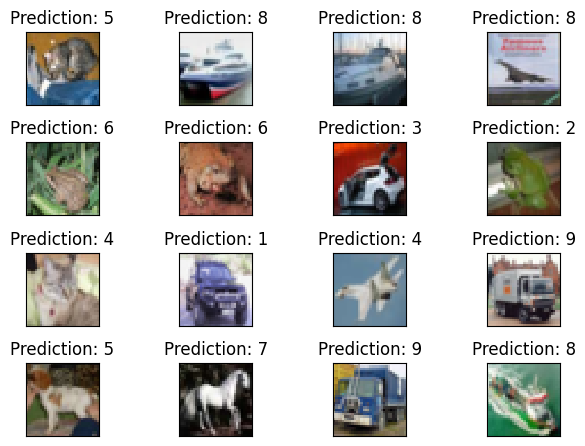

In [24]:
## Show an example predictions for the model.
fig = plt.figure()
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.tight_layout()
    plt.imshow(test_images[i], cmap = 'gray', interpolation='none')
    plt.title("Prediction: {}".format(predict_classes[i]))
    plt.xticks([])
    plt.yticks([])
img_file = results_dir.joinpath('assignment06-2a_Prediction_Images_QTY_16.png')
plt.savefig(img_file)
print("16 Prediction Images and Labels")
plt.show()